In [1]:
from mftool import Mftool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yahooquery import Ticker
import datetime
from dateutil.relativedelta import relativedelta
from jugaad_data.nse import index_raw

%matplotlib inline

In [58]:
import json

with open('codes.json') as f:
    data = json.load(f)


codes = {list(d.values())[0]: list(d.keys())[0] for d in data}
codes

{'Franklin India Liquid Super Institutional Direct Weekly Dividend Payout': '0P0000XVRM',
 'Franklin India Liquid Unclaimed Dividend Plan Growth': '0P0001I2M7',
 'Franklin India Liquid Institutional Weekly Dividend Payout': '0P00005UXL',
 'Franklin India Liquid-Super Institutional Plan Weekly Dividend Reinvestment': '0P0001BA6F',
 'Franklin India Liquid Super Institutional Direct Weekly Dividend Reinvestment': '0P0001BA6E',
 'Franklin India Liquid Unclaimed Dividend Investor Education Plan Growth': '0P0001IESO',
 'Franklin India Liquid Weekly Dividend Reinvestment': '0P0001BA6G',
 'Franklin India Liquid-Super Institutional Plan - Growth': '0P00005UXN',
 'Franklin India Liquid Institutional Daily Dividend Reinvestment': '0P00005UXJ',
 'Franklin India Liquid Daily Dividend Reinvestment': '0P00005UXH',
 'Franklin India Liquid Institutional Weekly Dividend Reinvestment': '0P0001BA6D',
 'Franklin India Liquid-Super Institutional Plan Weekly Dividend Payout': '0P00005UXO',
 'LIC of India - M

In [62]:
mutual_funds_yfinance = {'HDFC Index Fund Nifty 50 Plan-Direct Plan': '0P0000XW7T.BO',
 'Canara Robeco Bluechip Equity Dir Gr': '0P0000XW0O.BO',
 'Motilal Oswal Large and Midcap Fund - Direct Plan Growth': '0P0001II3X.BO', 
 'PGIM India Midcap Opportunities Fund Direct Growth': '0P00011MAT.BO',
 'quant Absolute Fund-Growth Option-Direct Plan': '0P0000XW4A.BO',
 'quant Small Cap Fund - Growth Option - Direct Plan': '0P0000XW4J.BO',
 'HDFC Flexi Cap Fund - Growth Option - Direct Plan': '0P0000XW77.BO',
 'Parag Parikh Flexi Cap Fund - Direct Plan - Growth': '0P0000YWL1.BO'
}


### Pulling Nifty Benchmark

In [20]:
n_years = 3 # Parameter for historical years

def convert_to_date(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%d %b %Y')
    return date_obj

# Get from and to dates
from_date = datetime.datetime.strptime('1-1-2019', '%d-%m-%Y').date()
to_date = datetime.datetime.strptime('31-12-2023', '%d-%m-%Y').date()
print(from_date, to_date)

# Fetch the index data 
raw_index_data = index_raw(symbol="NIFTY 500", from_date=from_date, to_date=to_date)

# Converting into dataframe and processing the data
nifty_500 = (pd.DataFrame(raw_index_data)\
                            .assign(HistoricalDate=lambda x: x['HistoricalDate'].apply(convert_to_date),
                                    CLOSE=lambda x: x['CLOSE'].astype(float))\
                            .sort_values('HistoricalDate')\
                            .drop_duplicates()\
                            .loc[lambda x: x['Index Name'] == 'Nifty 500']\
                            .reset_index(drop=True)\
                            .rename(columns={'HistoricalDate':'date'})
                   )
nifty_500

2019-01-01 2023-12-31


,Index Name,INDEX_NAME,date,OPEN,HIGH,LOW,CLOSE
0,Nifty 500,NIFTY 500,2019-01-01,9186.7,9206.05,9128.4,9197.90
1,Nifty 500,NIFTY 500,2019-01-02,9169.7,9195.25,9065.45,9103.40
2,Nifty 500,NIFTY 500,2019-01-03,9106.65,9130,9006.75,9014.80
3,Nifty 500,NIFTY 500,2019-01-04,9034.25,9064.85,8978.2,9054.90
4,Nifty 500,NIFTY 500,2019-01-07,9117.2,9136.3,9064.65,9081.15
...,...,...,...,...,...,...,...
1234,Nifty 500,Nifty 500,2023-12-22,19011.25,19089.95,18934.75,19054.70
1235,Nifty 500,Nifty 500,2023-12-26,19095,19173.8,19059.4,19148.85
1236,Nifty 500,Nifty 500,2023-12-27,19219.4,19312.3,19189.8,19296.95
1237,Nifty 500,Nifty 500,2023-12-28,19358.35,19414.55,19313.1,19399.25


### mftool

In [9]:
mf = Mftool()
result = mf.get_available_schemes('motilal oswal')
for scheme_code, scheme in result.items():
    print(scheme_code, scheme)

145834 Motilal Oswal Liquid Fund - Direct Growth
145946 Motilal Oswal Liquid Fund - Regular Growth
146218 Motilal Oswal Liquid Fund Direct - IDCW  Quarterly Payout/Reinvestment
146226 Motilal Oswal Liquid Fund Direct - IDCW Fortnightly Reinvestment
146223 Motilal Oswal Liquid Fund Direct - IDCW Monthly Payout/Reinvestment
146228 Motilal Oswal Liquid Fund Direct - IDCW Reinvestment
146229 Motilal Oswal Liquid Fund Direct - IDCW Weekly Reinvestment
146227 Motilal Oswal Liquid Fund Regular - IDCW Daily Reinvestment
146230 Motilal Oswal Liquid Fund Regular - IDCW Fortnightly Reinvestment
146220 Motilal Oswal Liquid Fund Regular - IDCW Monthly Payout/Reinvestment
146222 Motilal Oswal Liquid Fund Regular - IDCW Quarterly Payout/Reinvestment
146224 Motilal Oswal Liquid Fund Regular - IDCW Weekly Reinvestment
124234 Motilal Oswal Ultra Short Term Fund (MOFUSTF) -Direct Plan- Growth
124233 Motilal Oswal Ultra Short Term Fund (MOFUSTF)-Regular Plan- Growth
124316 Motilal Oswal Ultra Short Term F

In [4]:
mf = Mftool()
mutual_fund_code = '118989'
d1 = mf.get_scheme_quote(mutual_fund_code)
d2 = mf.get_scheme_details(mutual_fund_code)
{**d1, **d2}

{'scheme_code': 118989,
 'scheme_name': 'HDFC Mid-Cap Opportunities Fund - Growth Option - Direct Plan',
 'last_updated': '18-Jan-2024',
 'nav': '163.813',
 'fund_house': 'HDFC Mutual Fund',
 'scheme_type': 'Open Ended Schemes',
 'scheme_category': 'Equity Scheme - Mid Cap Fund',
 'scheme_start_date': {'date': '01-01-2013', 'nav': '18.79900'}}

#### Fetch NAV historicals and calculate cumulative returns

In [5]:
#Pull the mutual fund data
mutual_fund_code = '118989'
mutual_fund = 'HDFC Mid-Cap Opportunities Fund - Growth Option - Direct Plan'
start_date = pd.to_datetime('1-1-2021', format='%d-%m-%Y')
end_date = pd.to_datetime('31-12-2023', format='%d-%m-%Y')

df = mf.get_scheme_historical_nav(mutual_fund_code,as_Dataframe=True).reset_index()
df['nav'] = df['nav'].astype(float)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df = df.sort_values('date')
df = df.query("date >= @start_date and date <=@end_date").reset_index(drop=True)

#Calculate cumulative returns 
df['daily_returns'] = df['nav'].pct_change()
df['cumulative_returns'] = (df['daily_returns']+1).cumprod()
df

,date,nav,dayChange,daily_returns,cumulative_returns
0,2021-01-01,70.467,0.782,NaN,NaN
1,2021-01-04,71.773,1.306,0.018533,1.018533
2,2021-01-05,72.291,0.518,0.007217,1.025884
3,2021-01-06,72.085,-0.206,-0.002850,1.022961
4,2021-01-07,72.311,0.226,0.003135,1.026168
...,...,...,...,...,...
733,2023-12-22,158.213,1.007,0.006406,2.245207
734,2023-12-26,159.199,0.986,0.006232,2.259199
735,2023-12-27,159.613,0.414,0.002601,2.265074
736,2023-12-28,160.646,1.033,0.006472,2.279734


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

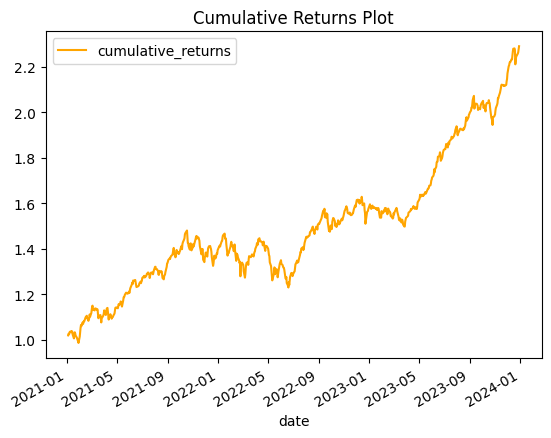

In [6]:
df.plot(x='date', y='cumulative_returns', color='orange')
plt.title('Cumulative Returns Plot')
plt.plot

#### Growth metrics

In [7]:
#Method 1
(df['cumulative_returns'].iloc[-1] - 1)*100

#Method 2
((df['nav'].iloc[-1]/df['nav'].iloc[0]) - 1)*100

129.15832943079738

In [8]:
n_years = 3
((df['nav'].iloc[-1]/df['nav'].iloc[0]) ** (1/n_years) - 1) * 100

31.839399383940826

### yahooquery

In [72]:
ticker = Ticker('0P0000XW0O.BO')
ticker.fund_top_holdings

symbol                    holdingName  \
symbol        row                                                 
0P0000XW0O.BO 0      HDFCBANK.NS                  HDFC Bank Ltd   
              1     ICICIBANK.NS                 ICICI Bank Ltd   
              2      RELIANCE.NS        Reliance Industries Ltd   
              3          INFY.NS                    Infosys Ltd   
              4            LT.NS            Larsen & Toubro Ltd   
              5    BHARTIARTL.NS              Bharti Airtel Ltd   
              6           TCS.NS  Tata Consultancy Services Ltd   
              7           ITC.NS                        ITC Ltd   
              8    BAJFINANCE.BO              Bajaj Finance Ltd   
              9    ULTRACEMCO.NS           UltraTech Cement Ltd   

                   holdingPercent  
symbol        row                  
0P0000XW0O.BO 0          0.098987  
              1          0.069611  
              2          0.062140  
              3          0.051284  
              4          0.048647  
              5          0.036891  
              6          0.033991  
              7          0.033743  
              8          0.030275  
              9          0.029699

,0P0000XW0O.BO
0,
realestate,0.0000
consumer_cyclical,0.1137
basic_materials,0.0401
consumer_defensive,0.0905
technology,0.1162
communication_services,0.0386
financial_services,0.3307
utilities,0.0274
industrials,0.1131


<Axes: ylabel='0'>

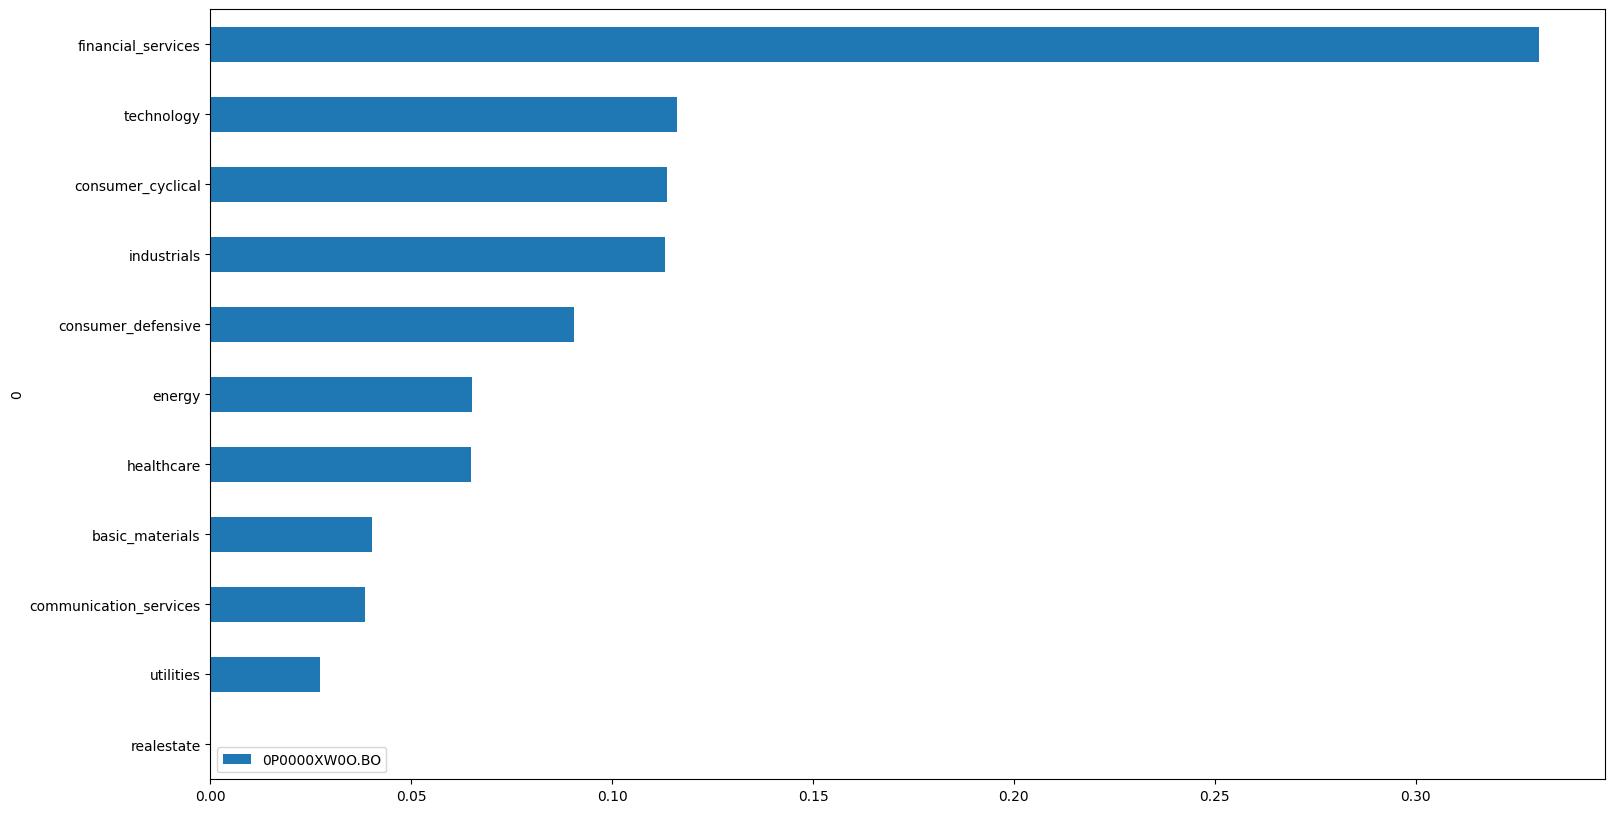

In [73]:
sector_weightings = ticker.fund_sector_weightings
display(sector_weightings)
sector_weightings.sort_values('0P0000XW0O.BO',).plot(kind='barh')

### Pulling multiple funds data & analyzing them

In [10]:
from mftool import Mftool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def fetch_mutual_fund_data(mutual_fund_code):
    mf = Mftool()
    
    df = (mf.get_scheme_historical_nav(mutual_fund_code,as_Dataframe=True).reset_index()\
          .assign(nav=lambda x: x['nav'].astype(float), 
                 date=lambda x: pd.to_datetime(x['date'], format='%d-%m-%Y'))\
          .sort_values('date')\
          .reset_index(drop=True)\
         )
    
    return df

# Fetch data for these funds
mutual_funds = {'120819': 'quant Absolute Fund-Growth Option-Direct Plan',
 '120828': 'quant Small Cap Fund - Growth Option - Direct Plan',
 '119063': 'HDFC Index Fund-NIFTY 50 Plan - Direct Plan',
 '118955': 'HDFC Flexi Cap Fund - Growth Option - Direct Plan',
 '118269': 'CANARA ROBECO BLUE CHIP EQUITY FUND - DIRECT PLAN - GROWTH OPTION',
 '122639': 'Parag Parikh Flexi Cap Fund - Direct Plan - Growth',
 '125307': 'PGIM India Midcap Opportunities Fund - Direct Plan - Growth Option', 
 '146271': 'Nippon India ETF Nifty Midcap 150', 
 '147704': 'Motilal Oswal Large and Midcap Fund - Direct Plan Growth',
}

mf_data_dict = dict()
for mutual_fund_code, mutual_fund_desc in mutual_funds.items():
    print(mutual_fund_desc)
    mf_data_dict[mutual_fund_desc] = fetch_mutual_fund_data(mutual_fund_code)

quant Absolute Fund-Growth Option-Direct Plan
quant Small Cap Fund - Growth Option - Direct Plan
HDFC Index Fund-NIFTY 50 Plan - Direct Plan
HDFC Flexi Cap Fund - Growth Option - Direct Plan
CANARA ROBECO BLUE CHIP EQUITY FUND - DIRECT PLAN - GROWTH OPTION
Parag Parikh Flexi Cap Fund - Direct Plan - Growth
PGIM India Midcap Opportunities Fund - Direct Plan - Growth Option
Nippon India ETF Nifty Midcap 150
Motilal Oswal Large and Midcap Fund - Direct Plan Growth


In [13]:
list(mutual_funds.values())

['quant Absolute Fund-Growth Option-Direct Plan',
 'quant Small Cap Fund - Growth Option - Direct Plan',
 'HDFC Index Fund-NIFTY 50 Plan - Direct Plan',
 'HDFC Flexi Cap Fund - Growth Option - Direct Plan',
 'CANARA ROBECO BLUE CHIP EQUITY FUND - DIRECT PLAN - GROWTH OPTION',
 'Parag Parikh Flexi Cap Fund - Direct Plan - Growth',
 'PGIM India Midcap Opportunities Fund - Direct Plan - Growth Option',
 'Nippon India ETF Nifty Midcap 150',
 'Motilal Oswal Large and Midcap Fund - Direct Plan Growth']

In [11]:
def get_cumulative_returns(df, 
                         nav_col='CLOSE', 
                         date_col='date',
                         starting_date='1-1-2019', 
                         ending_date ='31-12-2023'):
    start_date = pd.to_datetime(starting_date, format='%d-%m-%Y')
    end_date = pd.to_datetime(ending_date, format='%d-%m-%Y')
    
    df = (df\
          .sort_values(date_col)\
          .query(f"{date_col} >= @start_date and {date_col} <=@end_date")\
          .assign(daily_returns=lambda x: x[nav_col].pct_change(),
                  cumulative_daily_returns=lambda x: (x['daily_returns'] + 1).cumprod())\
          .reset_index(drop=True)\
         )
    
    return df

In [24]:
time_periods = {
    1: '1-1-2023', 
    2: '1-1-2022', 
    3: '1-1-2021',
    4: '1-1-2020',
    5: '1-1-2019',
}
results = []
time_period_dataframes = {time_period: dict() for time_period in time_periods}

# Index data
instrument_desc = 'NIFTY 500'
for time_period, starting_date in time_periods.items():
    
    n_years = time_period
    nifty_500_cumulative = get_cumulative_returns(nifty_500, 
                                                       nav_col='CLOSE', 
                                                       date_col='date',
                                                       starting_date=starting_date, 
                                                       ending_date ='31-12-2023')
    nifty_500_cumulative = nifty_500_cumulative.rename(columns={'Date':'date'})
    absolute_returns_prcnt = (nifty_500_cumulative['cumulative_daily_returns'].values[-1] - 1) * 100
    cagr = ((nifty_500_cumulative['CLOSE'].iloc[-1]/nifty_500_cumulative['CLOSE'].iloc[0]) ** (1/n_years) - 1) * 100
    
    time_period_dataframes[time_period][instrument_desc] = nifty_500_cumulative
    results += [(instrument_desc, time_period, absolute_returns_prcnt, cagr)]


# Mutual Funds data
mutual_funds_subset = ['quant Absolute Fund-Growth Option-Direct Plan',
 'quant Small Cap Fund - Growth Option - Direct Plan',
 'HDFC Index Fund-NIFTY 50 Plan - Direct Plan',
 'HDFC Flexi Cap Fund - Growth Option - Direct Plan',
 'CANARA ROBECO BLUE CHIP EQUITY FUND - DIRECT PLAN - GROWTH OPTION',
 'Parag Parikh Flexi Cap Fund - Direct Plan - Growth',
 'PGIM India Midcap Opportunities Fund - Direct Plan - Growth Option',
 'Nippon India ETF Nifty Midcap 150',
 'Motilal Oswal Large and Midcap Fund - Direct Plan Growth']

for instrument_desc in mutual_funds_subset: 
    for time_period, starting_date in time_periods.items():
        n_years = time_period
        mutual_fund_data = mf_data_dict[instrument_desc].copy(deep=True)
        mf_with_cumulative = get_cumulative_returns(mutual_fund_data, 
                                                           nav_col='nav', 
                                                           date_col='date',
                                                           starting_date=starting_date, 
                                                           ending_date ='31-12-2023')
        absolute_returns_prcnt = (mf_with_cumulative['cumulative_daily_returns'].values[-1] - 1) * 100
        cagr = ((mf_with_cumulative['nav'].iloc[-1]/mf_with_cumulative['nav'].iloc[0]) ** (1/n_years) - 1) * 100

        time_period_dataframes[time_period][instrument_desc] = mf_with_cumulative
        results += [(instrument_desc, time_period, absolute_returns_prcnt, cagr)]

#### Tabular Comparison

In [25]:
result_df = pd.DataFrame(results, columns=['Fund', 'Years', 'Abs_returns_prcnt', 'CAGR']).\
pivot(index='Fund', columns='Years', values=['Abs_returns_prcnt', 'CAGR'])
result_df.columns = [f'{x}_{y}' for x, y in result_df.columns]
result_df = result_df.applymap(lambda x: f"{x:.2f}%")
result_df

,Abs_returns_prcnt_1,Abs_returns_prcnt_2,Abs_returns_prcnt_3,Abs_returns_prcnt_4,Abs_returns_prcnt_5,CAGR_1,CAGR_2,CAGR_3,CAGR_4,CAGR_5
Fund,,,,,,,,,,
CANARA ROBECO BLUE CHIP EQUITY FUND - DIRECT PLAN - GROWTH OPTION,23.19%,24.75%,59.69%,99.45%,133.57%,23.19%,11.69%,16.89%,18.84%,18.49%
HDFC Flexi Cap Fund - Growth Option - Direct Plan,30.67%,54.18%,113.16%,128.64%,144.90%,30.67%,24.17%,28.70%,22.97%,19.62%
HDFC Index Fund-NIFTY 50 Plan - Direct Plan,20.41%,25.59%,59.32%,84.01%,107.61%,20.41%,12.07%,16.79%,16.47%,15.73%
Motilal Oswal Large and Midcap Fund - Direct Plan Growth,39.75%,42.67%,105.63%,136.59%,149.00%,39.75%,19.45%,27.16%,24.02%,20.02%
NIFTY 500,25.16%,27.78%,67.86%,96.48%,111.23%,25.16%,13.04%,18.84%,18.39%,16.13%
Nippon India ETF Nifty Midcap 150,43.27%,47.86%,118.19%,175.64%,188.20%,43.27%,21.60%,29.70%,28.85%,23.58%
PGIM India Midcap Opportunities Fund - Direct Plan - Growth Option,21.68%,21.48%,102.02%,208.64%,223.62%,21.68%,10.22%,26.41%,32.55%,26.48%
Parag Parikh Flexi Cap Fund - Direct Plan - Growth,37.49%,28.68%,89.30%,152.66%,190.97%,37.49%,13.44%,23.70%,26.08%,23.81%
quant Absolute Fund-Growth Option-Direct Plan,16.76%,33.70%,94.42%,168.32%,187.07%,16.76%,15.63%,24.81%,27.99%,23.48%


In [27]:
result_df.sort_values(['CAGR_1', 'CAGR_2'], ascending=False)

,Abs_returns_prcnt_1,Abs_returns_prcnt_2,Abs_returns_prcnt_3,Abs_returns_prcnt_4,Abs_returns_prcnt_5,CAGR_1,CAGR_2,CAGR_3,CAGR_4,CAGR_5
Fund,,,,,,,,,,
quant Small Cap Fund - Growth Option - Direct Plan,45.56%,61.63%,212.62%,452.20%,325.65%,45.56%,27.13%,46.22%,53.29%,33.60%
Nippon India ETF Nifty Midcap 150,43.27%,47.86%,118.19%,175.64%,188.20%,43.27%,21.60%,29.70%,28.85%,23.58%
Motilal Oswal Large and Midcap Fund - Direct Plan Growth,39.75%,42.67%,105.63%,136.59%,149.00%,39.75%,19.45%,27.16%,24.02%,20.02%
Parag Parikh Flexi Cap Fund - Direct Plan - Growth,37.49%,28.68%,89.30%,152.66%,190.97%,37.49%,13.44%,23.70%,26.08%,23.81%
HDFC Flexi Cap Fund - Growth Option - Direct Plan,30.67%,54.18%,113.16%,128.64%,144.90%,30.67%,24.17%,28.70%,22.97%,19.62%
NIFTY 500,25.16%,27.78%,67.86%,96.48%,111.23%,25.16%,13.04%,18.84%,18.39%,16.13%
CANARA ROBECO BLUE CHIP EQUITY FUND - DIRECT PLAN - GROWTH OPTION,23.19%,24.75%,59.69%,99.45%,133.57%,23.19%,11.69%,16.89%,18.84%,18.49%
PGIM India Midcap Opportunities Fund - Direct Plan - Growth Option,21.68%,21.48%,102.02%,208.64%,223.62%,21.68%,10.22%,26.41%,32.55%,26.48%
HDFC Index Fund-NIFTY 50 Plan - Direct Plan,20.41%,25.59%,59.32%,84.01%,107.61%,20.41%,12.07%,16.79%,16.47%,15.73%


#### Visualizing cumulative returns

[]

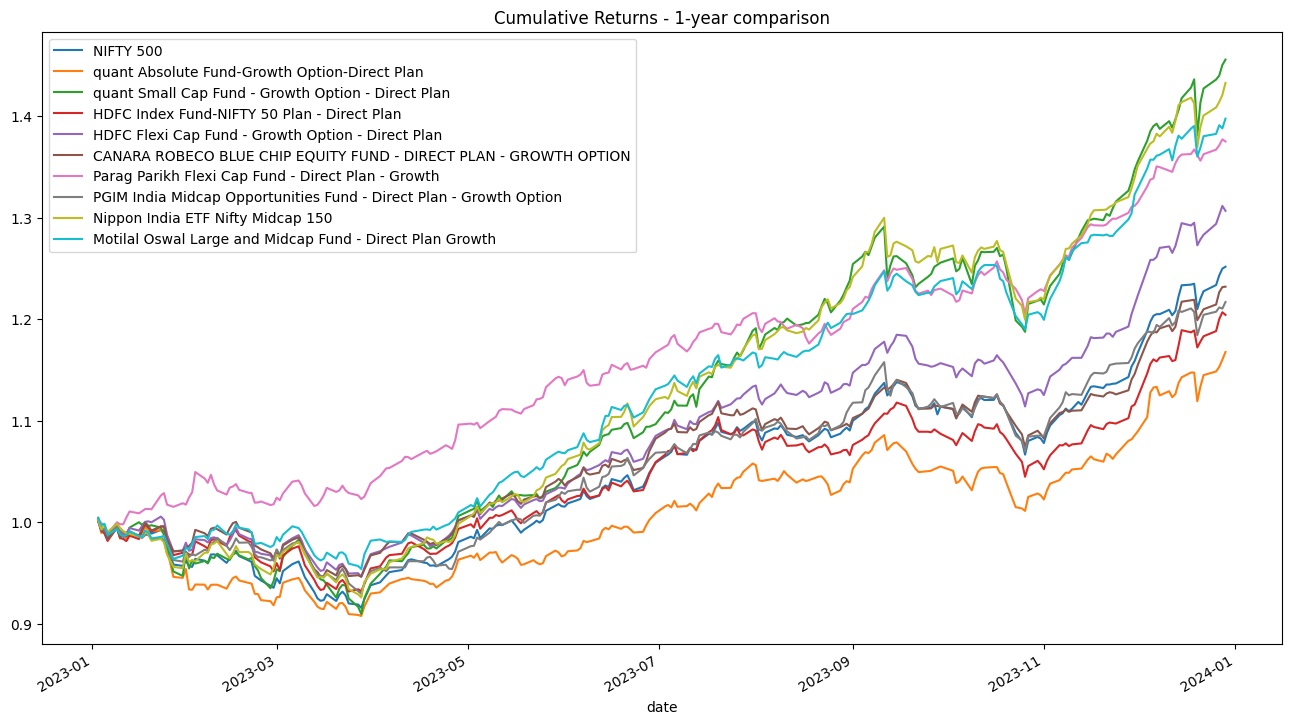

In [28]:
plt.rcParams["figure.figsize"] = [16,9]
time_period = 1

for idx, (instrument_desc, instrument_data) in enumerate(time_period_dataframes[time_period].items()):
    if idx == 0:
        ax = instrument_data.plot(y='cumulative_daily_returns', x='date', label=instrument_desc)
    else:
        instrument_data.plot(ax = ax, y='cumulative_daily_returns', x='date', label=instrument_desc)

plt.title(f"Cumulative Returns - {time_period}-year comparison")
ax.legend(loc='upper left')
plt.plot()

[]

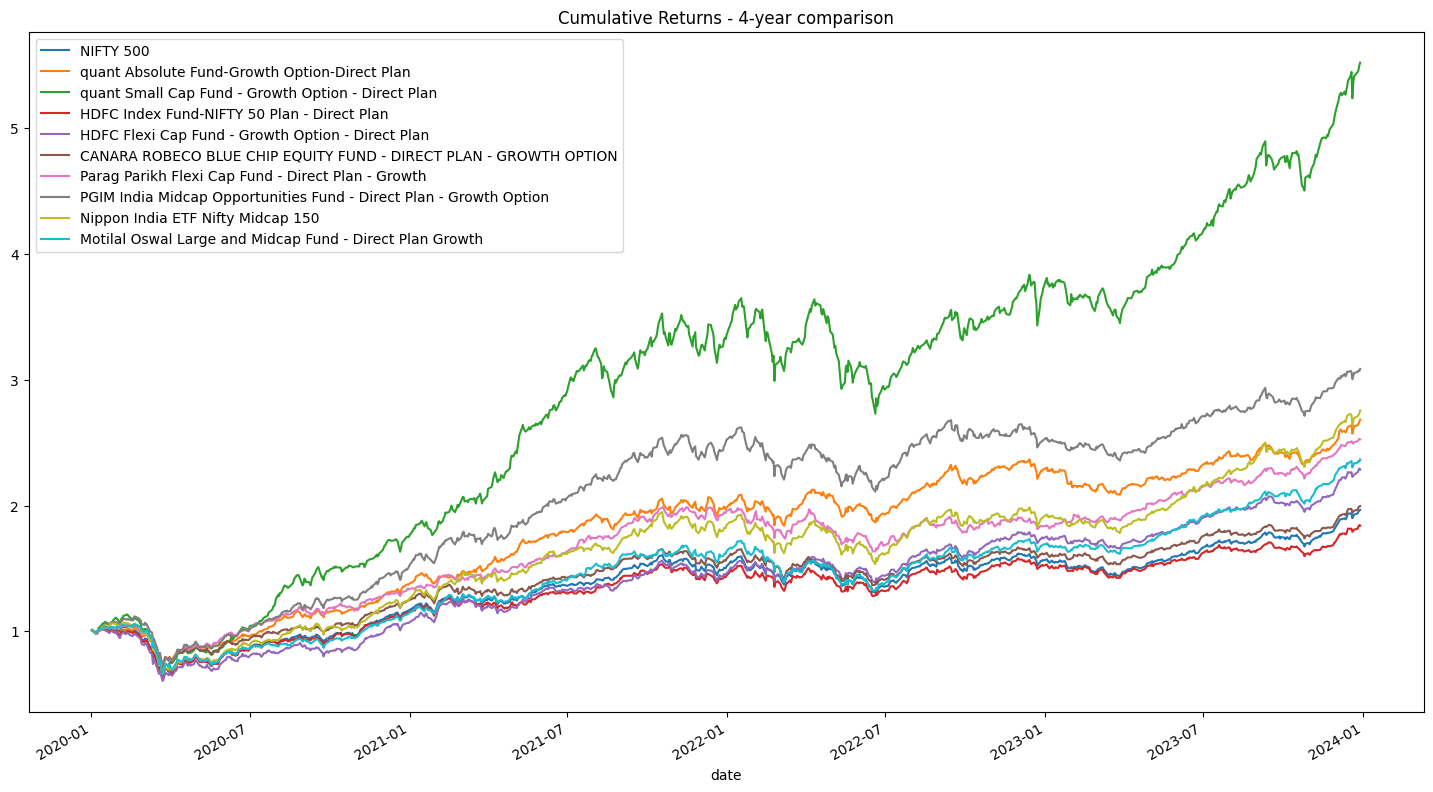

In [29]:
plt.rcParams["figure.figsize"] = [18,10]
time_period = 4

for idx, (instrument_desc, instrument_data) in enumerate(time_period_dataframes[time_period].items()):
    if idx == 0:
        ax = instrument_data.plot(y='cumulative_daily_returns', x='date', label=instrument_desc)
    else:
        instrument_data.plot(ax = ax, y='cumulative_daily_returns', x='date', label=instrument_desc)

plt.title(f"Cumulative Returns - {time_period}-year comparison")
ax.legend(loc='upper left')
plt.plot()